In [1]:
# Description: Plot Figure 2 (maps of total ocean stress curl [ice + wind]).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        April/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import open_dataset
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import FuncFormatter

In [3]:
def cbfmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    if b==0:
        return r'$0$'
    else:
        return r'${}\times10^{{{}}}$'.format(a, b)

def bmap_antarctica(ax, resolution='i', draw_labels=False):
    """
    Full Antartica basemap (Polar Stereographic Projection).
    """
    m = Basemap(boundinglat=-55,
                lon_0=0,
                projection='spstere',
                resolution=resolution,
                ax=ax)

    m.fillcontinents(color='0.9', zorder=13)
    m.drawcoastlines(zorder=14)
    m.drawmapboundary(zorder=-9999)
    if draw_labels:
        m.drawmeridians(np.arange(-180, 180, 30), linewidth=0.1, labels=[1, 1, 1, 1], zorder=12)
    else:
        m.drawmeridians(np.arange(-180, 180, 30), linewidth=0.1, labels=[0, 0, 0, 0], zorder=12)
    m.drawparallels(np.arange(-70, -50, 10), linewidth=0.1, labels=[0, 0, 0, 0], zorder=12)

    return m

/home/andre/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: No contour levels were found within the data range.


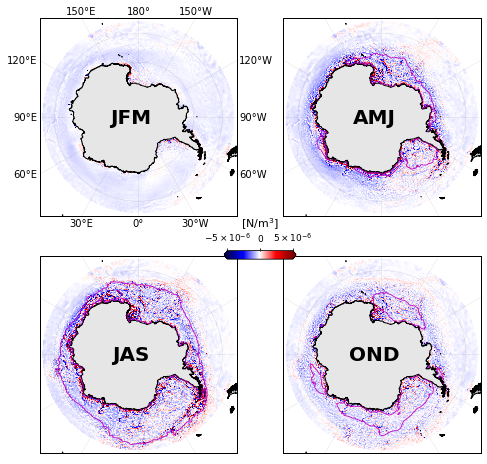

In [4]:
plt.close('all')

segments = ["A-B", "WAP", "Weddell", "W-EA", "E-EA", "Ross"]
iceconc_edge = 0.85
fname = '../../data_reproduce_figs/srfstresses_ocn_monthly.nc'
ds = open_dataset(fname)

xt, yt = ds['lon'].values, ds['lat'].values
curltautot_JFM = (ds['curltot'].sel(dict(month=1)).values + ds['curltot'].sel(dict(month=2)).values + ds['curltot'].sel(dict(month=3)).values)/3
curltautot_AMJ = (ds['curltot'].sel(dict(month=4)).values + ds['curltot'].sel(dict(month=5)).values + ds['curltot'].sel(dict(month=6)).values)/3
curltautot_JAS = (ds['curltot'].sel(dict(month=7)).values + ds['curltot'].sel(dict(month=8)).values + ds['curltot'].sel(dict(month=9)).values)/3
curltautot_OND = (ds['curltot'].sel(dict(month=10)).values + ds['curltot'].sel(dict(month=11)).values + ds['curltot'].sel(dict(month=12)).values)/3

iceconc_JFM = (ds['curltot'].sel(dict(month=1)).values + ds['iceconc'].sel(dict(month=2)).values + ds['iceconc'].sel(dict(month=3)).values)/3
iceconc_AMJ = (ds['iceconc'].sel(dict(month=4)).values + ds['iceconc'].sel(dict(month=5)).values + ds['iceconc'].sel(dict(month=6)).values)/3
iceconc_JAS = (ds['iceconc'].sel(dict(month=7)).values + ds['iceconc'].sel(dict(month=8)).values + ds['iceconc'].sel(dict(month=9)).values)/3
iceconc_OND = (ds['iceconc'].sel(dict(month=10)).values + ds['iceconc'].sel(dict(month=11)).values + ds['iceconc'].sel(dict(month=12)).values)/3

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8, 8))
ax1, ax2, ax3, ax4 = ax.flatten()
m1 = bmap_antarctica(ax1, draw_labels=True)
m2 = bmap_antarctica(ax2, draw_labels=False)
m3 = bmap_antarctica(ax3, draw_labels=False)
m4 = bmap_antarctica(ax4, draw_labels=False)

ctmin, ctmax = -5e-6, 5e-6

cs1 = m1.pcolormesh(xt, yt, curltautot_JFM, vmin=ctmin, vmax=ctmax, cmap=plt.cm.seismic, latlon=True)
cs2 = m2.pcolormesh(xt, yt, curltautot_AMJ, vmin=ctmin, vmax=ctmax, cmap=plt.cm.seismic, latlon=True)
cs3 = m3.pcolormesh(xt, yt, curltautot_JAS, vmin=ctmin, vmax=ctmax, cmap=plt.cm.seismic, latlon=True)
cs4 = m4.pcolormesh(xt, yt, curltautot_OND, vmin=ctmin, vmax=ctmax, cmap=plt.cm.seismic, latlon=True)

m1.contour(xt, yt, iceconc_JFM, linewidths=0.8, colors='m', levels=[iceconc_edge], latlon=True, zorder=99999)
m2.contour(xt, yt, iceconc_AMJ, linewidths=0.8, colors='m', levels=[iceconc_edge], latlon=True, zorder=99999)
m3.contour(xt, yt, iceconc_JAS, linewidths=0.8, colors='m', levels=[iceconc_edge], latlon=True, zorder=99999)
m4.contour(xt, yt, iceconc_OND, linewidths=0.8, colors='m', levels=[iceconc_edge], latlon=True, zorder=99999)

xt, yt = -3.7e6, -4e6
t1, t2, t3, t4 = "JFM", "AMJ", "JAS", "OND"
ax1.text(xt, yt, t1, fontsize=20, fontweight='black', ha='center', va='center', zorder=999999)
ax2.text(xt, yt, t2, fontsize=20, fontweight='black', ha='center', va='center', zorder=999999)
ax3.text(xt, yt, t3, fontsize=20, fontweight='black', ha='center', va='center', zorder=999999)
ax4.text(xt, yt, t4, fontsize=20, fontweight='black', ha='center', va='center', zorder=999999)

# Colorbar.
cbaxes = fig.add_axes([0.45, 0.462, 0.125, 0.015])
cb = fig.colorbar(mappable=cs1, cax=cbaxes, orientation='horizontal', extend='both', format=FuncFormatter(cbfmt))
cb.set_ticks([ctmin, 0, ctmax])
cb.ax.xaxis.set_tick_params(labelsize=9)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.set_label('[N/m$^3$]', fontsize=11)

plt.show()
fig.savefig("fig02.png", dpi=300, bbox_inches='tight')